In [1]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     


── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


[1] "fitbit"

In [2]:
library(scales)
library(lubridate)


Attaching package: ‘scales’




The following object is masked from ‘package:purrr’:

    discard




The following object is masked from ‘package:readr’:

    col_factor




In [3]:
daily_activity <- read_csv ("/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/dailyActivity_merged.csv")

Rows: 457 Columns: 15


── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): ActivityDate
dbl (14): Id, TotalSteps, TotalDistance, TrackerDistance, LoggedActivitiesDi...



ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [4]:
daily_activity$Ymd <- mdy(daily_activity$ActivityDate)

In [5]:
str(daily_activity)

spc_tbl_ [457 × 16] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Id                      : num [1:457] 1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ ActivityDate            : chr [1:457] "3/25/2016" "3/26/2016" "3/27/2016" "3/28/2016" ...
 $ TotalSteps              : num [1:457] 11004 17609 12736 13231 12041 ...
 $ TotalDistance           : num [1:457] 7.11 11.55 8.53 8.93 7.85 ...
 $ TrackerDistance         : num [1:457] 7.11 11.55 8.53 8.93 7.85 ...
 $ LoggedActivitiesDistance: num [1:457] 0 0 0 0 0 0 0 0 0 0 ...
 $ VeryActiveDistance      : num [1:457] 2.57 6.92 4.66 3.19 2.16 ...
 $ ModeratelyActiveDistance: num [1:457] 0.46 0.73 0.16 0.79 1.09 ...
 $ LightActiveDistance     : num [1:457] 4.07 3.91 3.71 4.95 4.61 ...
 $ SedentaryActiveDistance : num [1:457] 0 0 0 0 0 0 0 0 0 0 ...
 $ VeryActiveMinutes       : num [1:457] 33 89 56 39 28 30 33 47 40 15 ...
 $ FairlyActiveMinutes     : num [1:457] 12 17 5 20 28 13 12 21 11 30 ...
 $ LightlyActiveMinutes    : num [1:457] 205 274 268 224

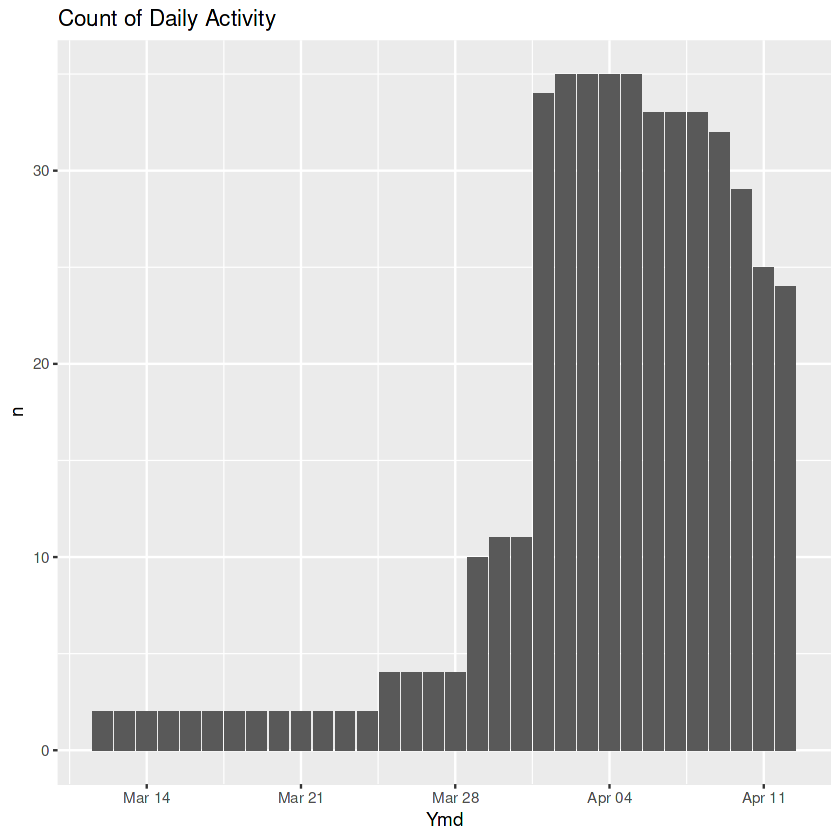

In [6]:
daily_activity %>% count(Ymd, sort = TRUE) %>%
ggplot() + geom_col(aes(x=Ymd,y=n)) +
labs(title="Count of Daily Activity")

NULL

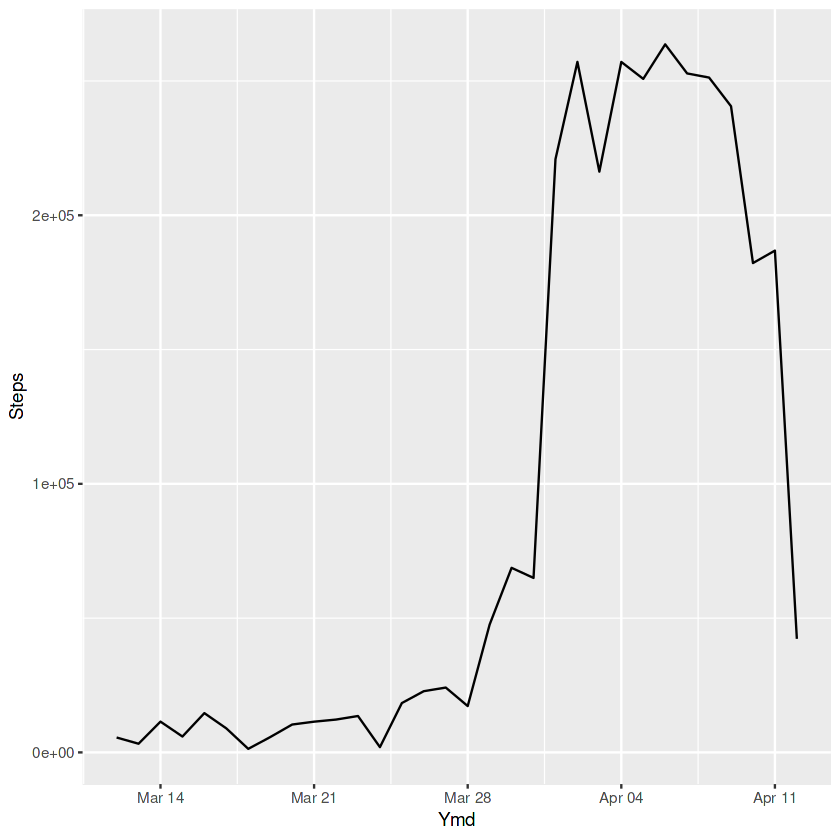

In [7]:
total_steps <- daily_activity %>% group_by(Ymd) %>%
summarise( Steps = sum(TotalSteps,na.rm=TRUE),
          Mean = mean(TotalSteps, na.rm = TRUE))
ggplot(total_steps) + geom_line(aes(x=Ymd,y=Steps))
labs(title="Total Steps By Day") +
scale_y_continuous(labels = comma)

NULL

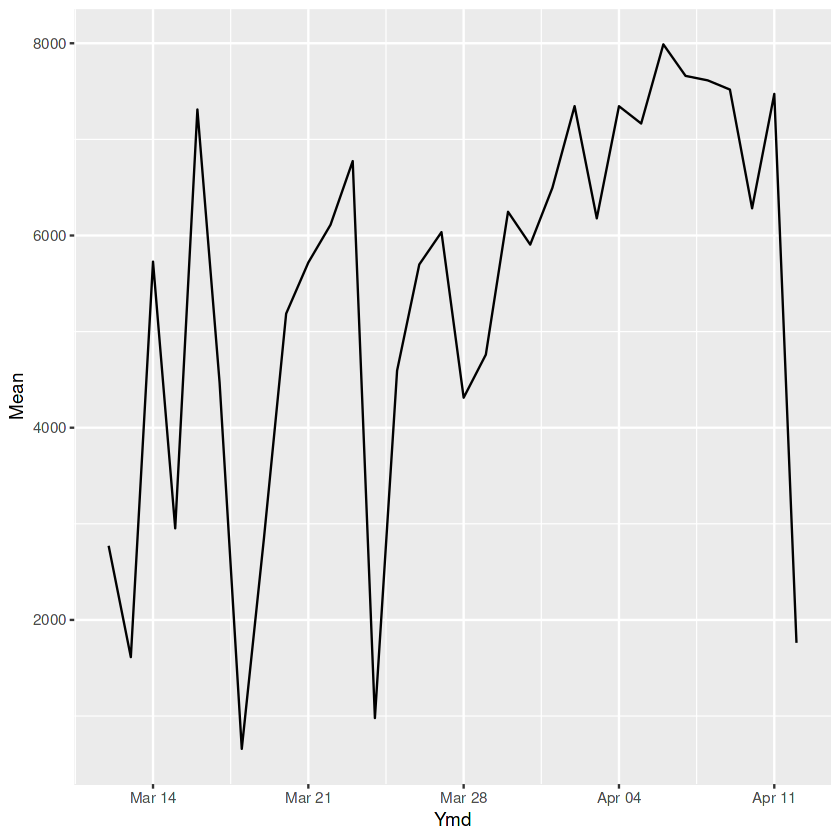

In [8]:
ggplot(total_steps) + geom_line(aes(x=Ymd,y=Mean))
labs(title="Average Steps By Day") +
scale_y_continuous(labels = comma)

In [9]:
total_distance <- daily_activity %>% group_by(Ymd) %>%
summarise( Total = sum(TotalDistance ,na.rm=TRUE),
          Mean = mean(TotalDistance , na.rm = TRUE))

$title
[1] "Total Distance by Day"

attr(,"class")
[1] "labels"

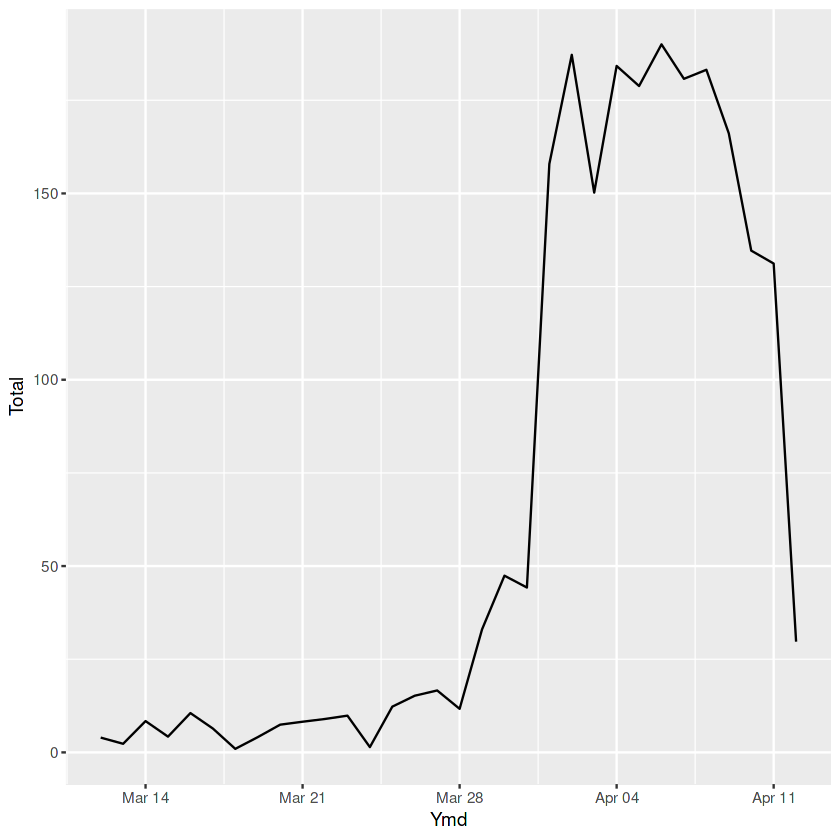

In [10]:
ggplot(total_distance) +
geom_line(aes(x=Ymd,y=Total))
labs(title="Total Distance by Day")

$y
[1] "Total Distance"

$title
[1] "Total Distance by Day"

attr(,"class")
[1] "labels"

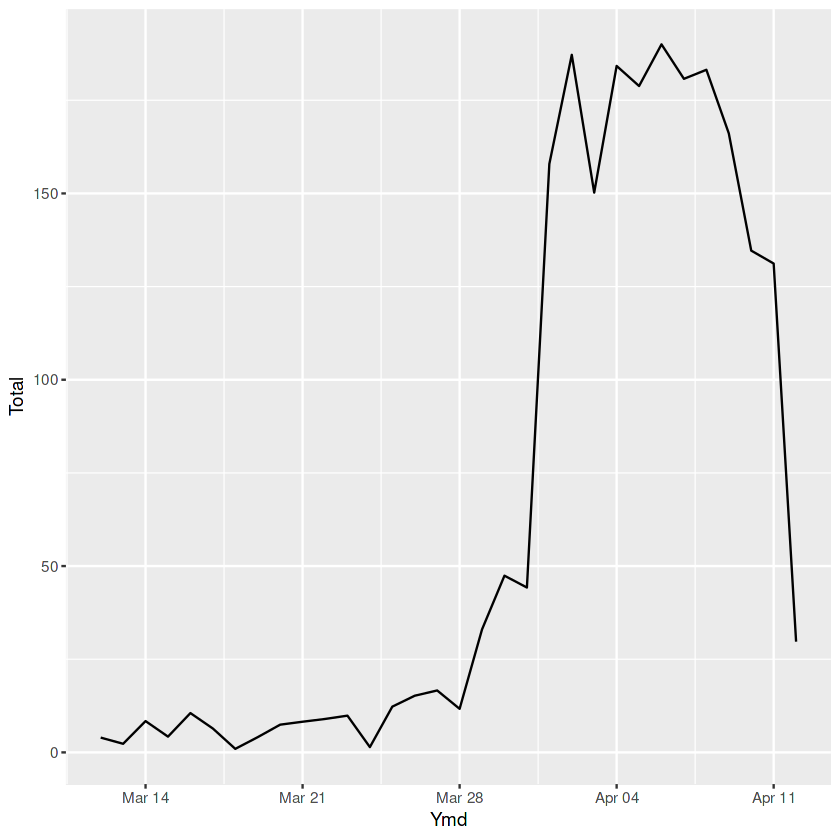

In [11]:
ggplot(total_distance) +
geom_line(aes(x=Ymd,y=Total))
labs(title="Total Distance by Day", y= "Total Distance")

Around May, you can see the data dips while the data also starts heavily around March. The trends here are that all the data sets rise and dip around the same times, showing the amount of rigorous activity that was recorded during these times